In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import csv

In [4]:
dataset_dat_path = "/Users/vladimir/C3/umn_foursquare_datasets/checkins.dat"

In [5]:
with open(dataset_dat_path) as dat_file, open('checkins.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)

    for line in dat_file:
        row = [field.strip() for field in line.split('|')]
        if len(row) == 6 and row[3] and row[4]:
            csv_writer.writerow(row)

In [6]:
dataset_csv_path = "/Users/vladimir/C3/checkins.csv"

In [26]:
data = pd.DataFrame.from_csv(dataset_csv_path)

/Applications/anaconda/envs/ML_course/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [27]:
data.head()

,user_id,venue_id,latitude,longitude,created_at
id,,,,,
984222,15824,5222,38.895112,-77.036366,2012-04-21 17:43:47
984234,44652,5222,33.800745,-84.410520,2012-04-21 17:43:43
984291,105054,5222,45.523452,-122.676207,2012-04-21 17:39:22
984318,2146539,5222,40.764462,-111.904565,2012-04-21 17:35:46
984232,93870,380645,33.448377,-112.074037,2012-04-21 17:38:18


In [28]:
data = data[:100000].drop(["user_id", "venue_id", "created_at"], axis = 1)

In [32]:
from sklearn.cluster import MeanShift

ms = MeanShift(bandwidth=0.1)
ms.fit(data)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [66]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


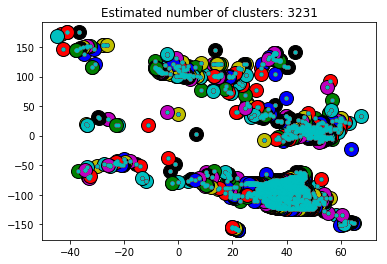

In [81]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(cluster_centers[:, 0], cluster_centers[:, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [129]:
labels_unique = np.unique(labels, return_counts=True)
approved_points = labels_unique[1][15:]
approved_points

array([868, 870, 645, ...,   1,   1,   1])

In [164]:
approved_centers = ms.cluster_centers_[15:]
approved_centers[5]


array([  37.34787114, -121.94728722])

In [182]:
offices = [[33.751277, -118.188740],
           [25.867736, -80.324116],
           [51.503016, -0.075479],
           [52.378894, 4.885084],
           [39.366487, 117.036146],
           [-33.868457, 151.205134]]


In [204]:
import scipy
from collections import defaultdict

dists = defaultdict()

for office in offices:
    for center in approved_centers:
        dists[str(center)] = scipy.spatial.distance.euclidean(office, center)
    
# for office in offices:
#     for center in approved_centers:
#         dist = scipy.spatial.distance.euclidean(office, center)
#         for min_dist in min_dists:
#             if (dist < min_dist):
#                 min_dist   = dist
#                 office_loc = office
#                 center_loc = center

In [185]:
print min_dist, office_loc, center_loc

0.00783475816311 [-33.868457, 151.205134] [-33.86063043 151.20477593]


In [191]:
def write_ans(name, ans):
    filename = str(name) + ".txt"
    file = open(filename, 'w')
    file.write(str(ans))
    file.close
    print "File successfully created!"

In [192]:
write_ans(1, center_loc)

File successfully created!
